In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

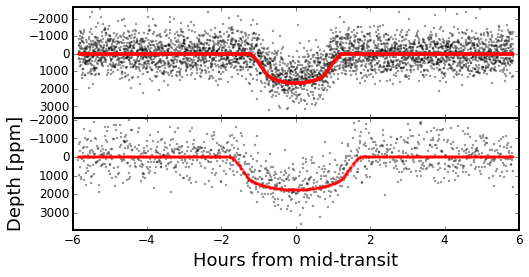

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

-0.00089322093492889463

In [6]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 72.2 ms per loop


In [7]:
#fit = model.fit_leastsq(params, options={'disp':True})
#fig = model.plot_planets(lc.default_params, color='b'); 
#fig = model.plot_planets(model._bestfit, color='r', fig=fig);

Now, let's do a test `emcee` fit (this many iterations takes about 5 minutes):

In [7]:
import time
start = time.time()
model.fit_emcee(nburn=10, niter=50); 
stop = time.time()
print 'emcee fit took {:.1f} minutes.'.format((stop-start)/60)

emcee fit took 5.8 minutes.


In [8]:
model.save_hdf('test_model.h5')

In [9]:
model = TransitModel.load_hdf('test_model.h5')

In [10]:
model.samples.head()

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0.000280,0.999368,0.500534,0.499626,3.999141,5.840848,135.922512,0.499749,0.037741,0.001692,0.001203,19.850192,133.650824,0.499220,0.039460,0.000515,0.001877
1,0.000280,0.999368,0.500534,0.499626,3.999141,5.840848,135.922512,0.499749,0.037741,0.001692,0.001203,19.850192,133.650824,0.499220,0.039460,0.000515,0.001877
2,0.000280,0.999368,0.500534,0.499626,3.999141,5.840848,135.922512,0.499749,0.037741,0.001692,0.001203,19.850192,133.650824,0.499220,0.039460,0.000515,0.001877
3,0.000537,0.999849,0.499724,0.499844,3.999061,5.840375,135.923049,0.499389,0.037299,0.001496,0.000970,19.850546,133.650651,0.499393,0.039507,0.000456,0.001548
4,0.000573,0.999819,0.499479,0.500266,3.998698,5.840293,135.922757,0.499429,0.037589,0.001531,0.000868,19.850578,133.651341,0.499156,0.039325,0.000475,0.001249


In [11]:
model.samples.std()

dilution    0.030363
flux_zp     0.084227
q1          0.046865
q2          0.167471
rho         0.194425
period_1    0.102681
epoch_1     0.103700
b_1         0.073470
rprs_1      0.098546
ecc_1       0.174960
omega_1     0.032175
period_2    0.108075
epoch_2     0.135264
b_2         0.067425
rprs_2      0.040225
ecc_2       0.099475
omega_2     0.093302
dtype: float64

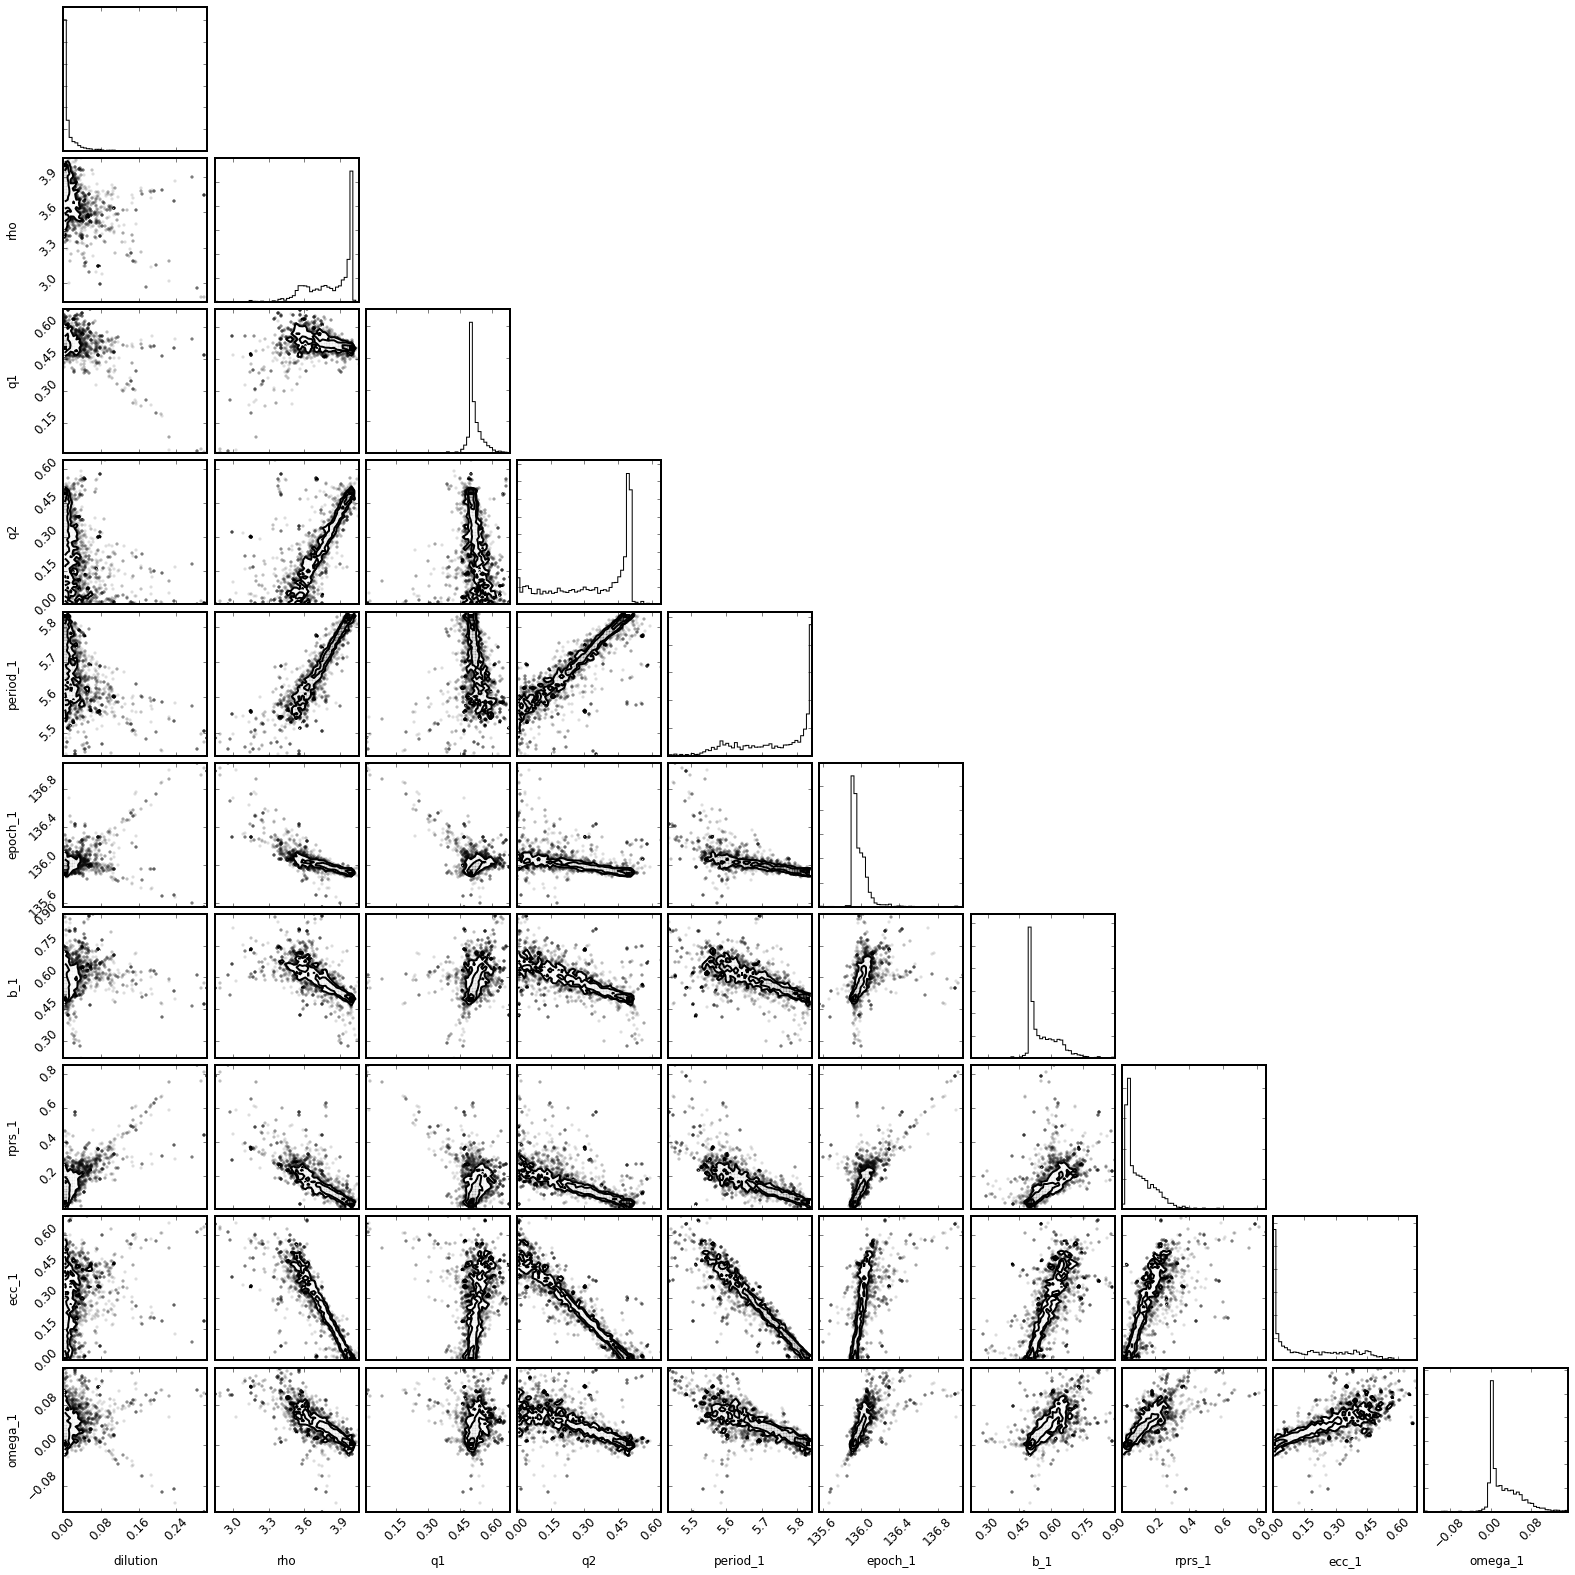

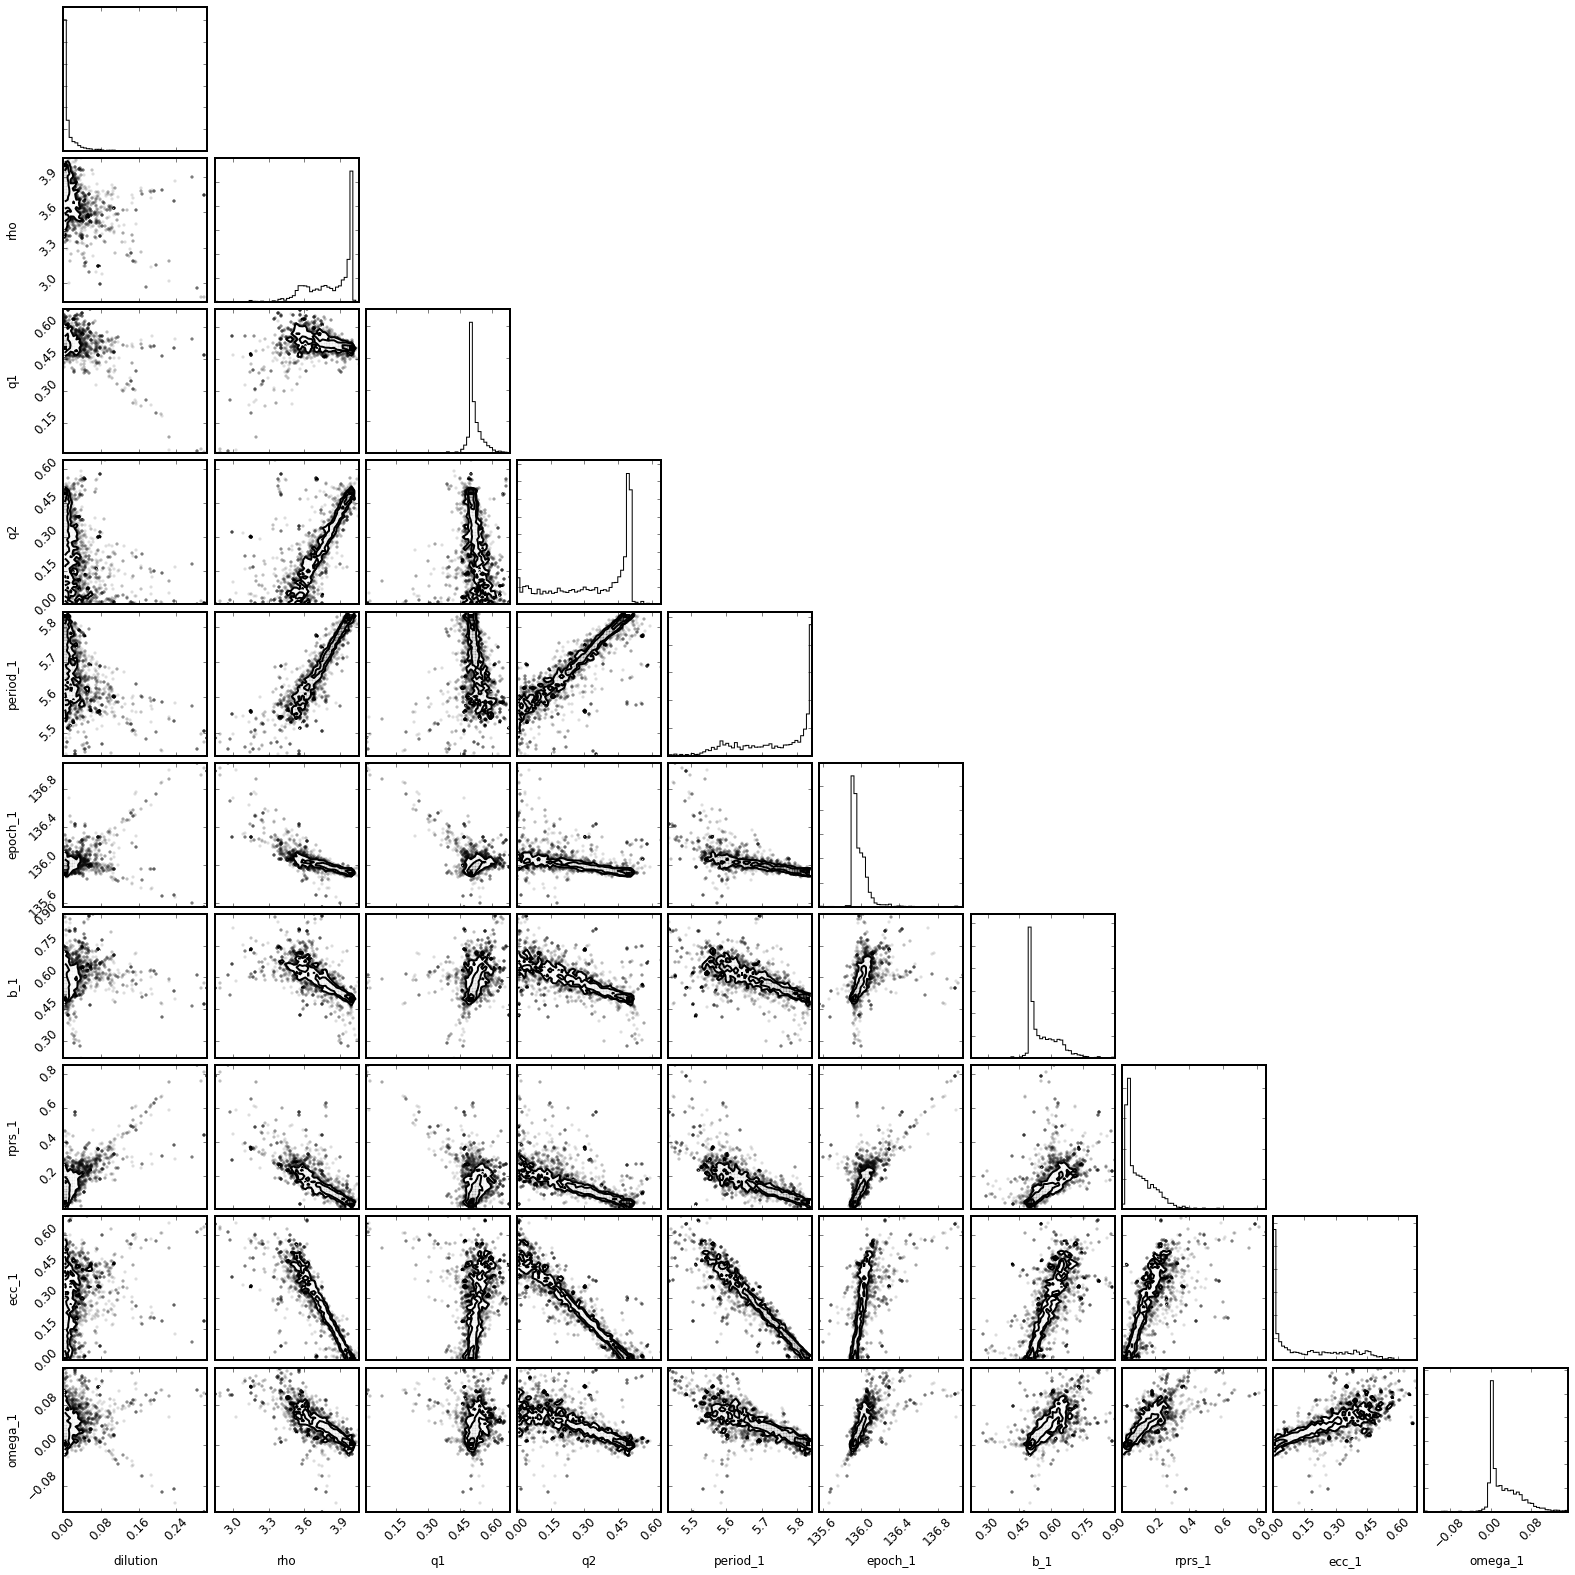

In [12]:
model.triangle(i=0); # for first planet

In [8]:
import time
start = time.time()
model.fit_emcee(nburn=100, niter=200)
stop = time.time()
print '{:.1f}'.format((stop-start)/60)

16.9


In [9]:
model.save_hdf('test_model.h5')

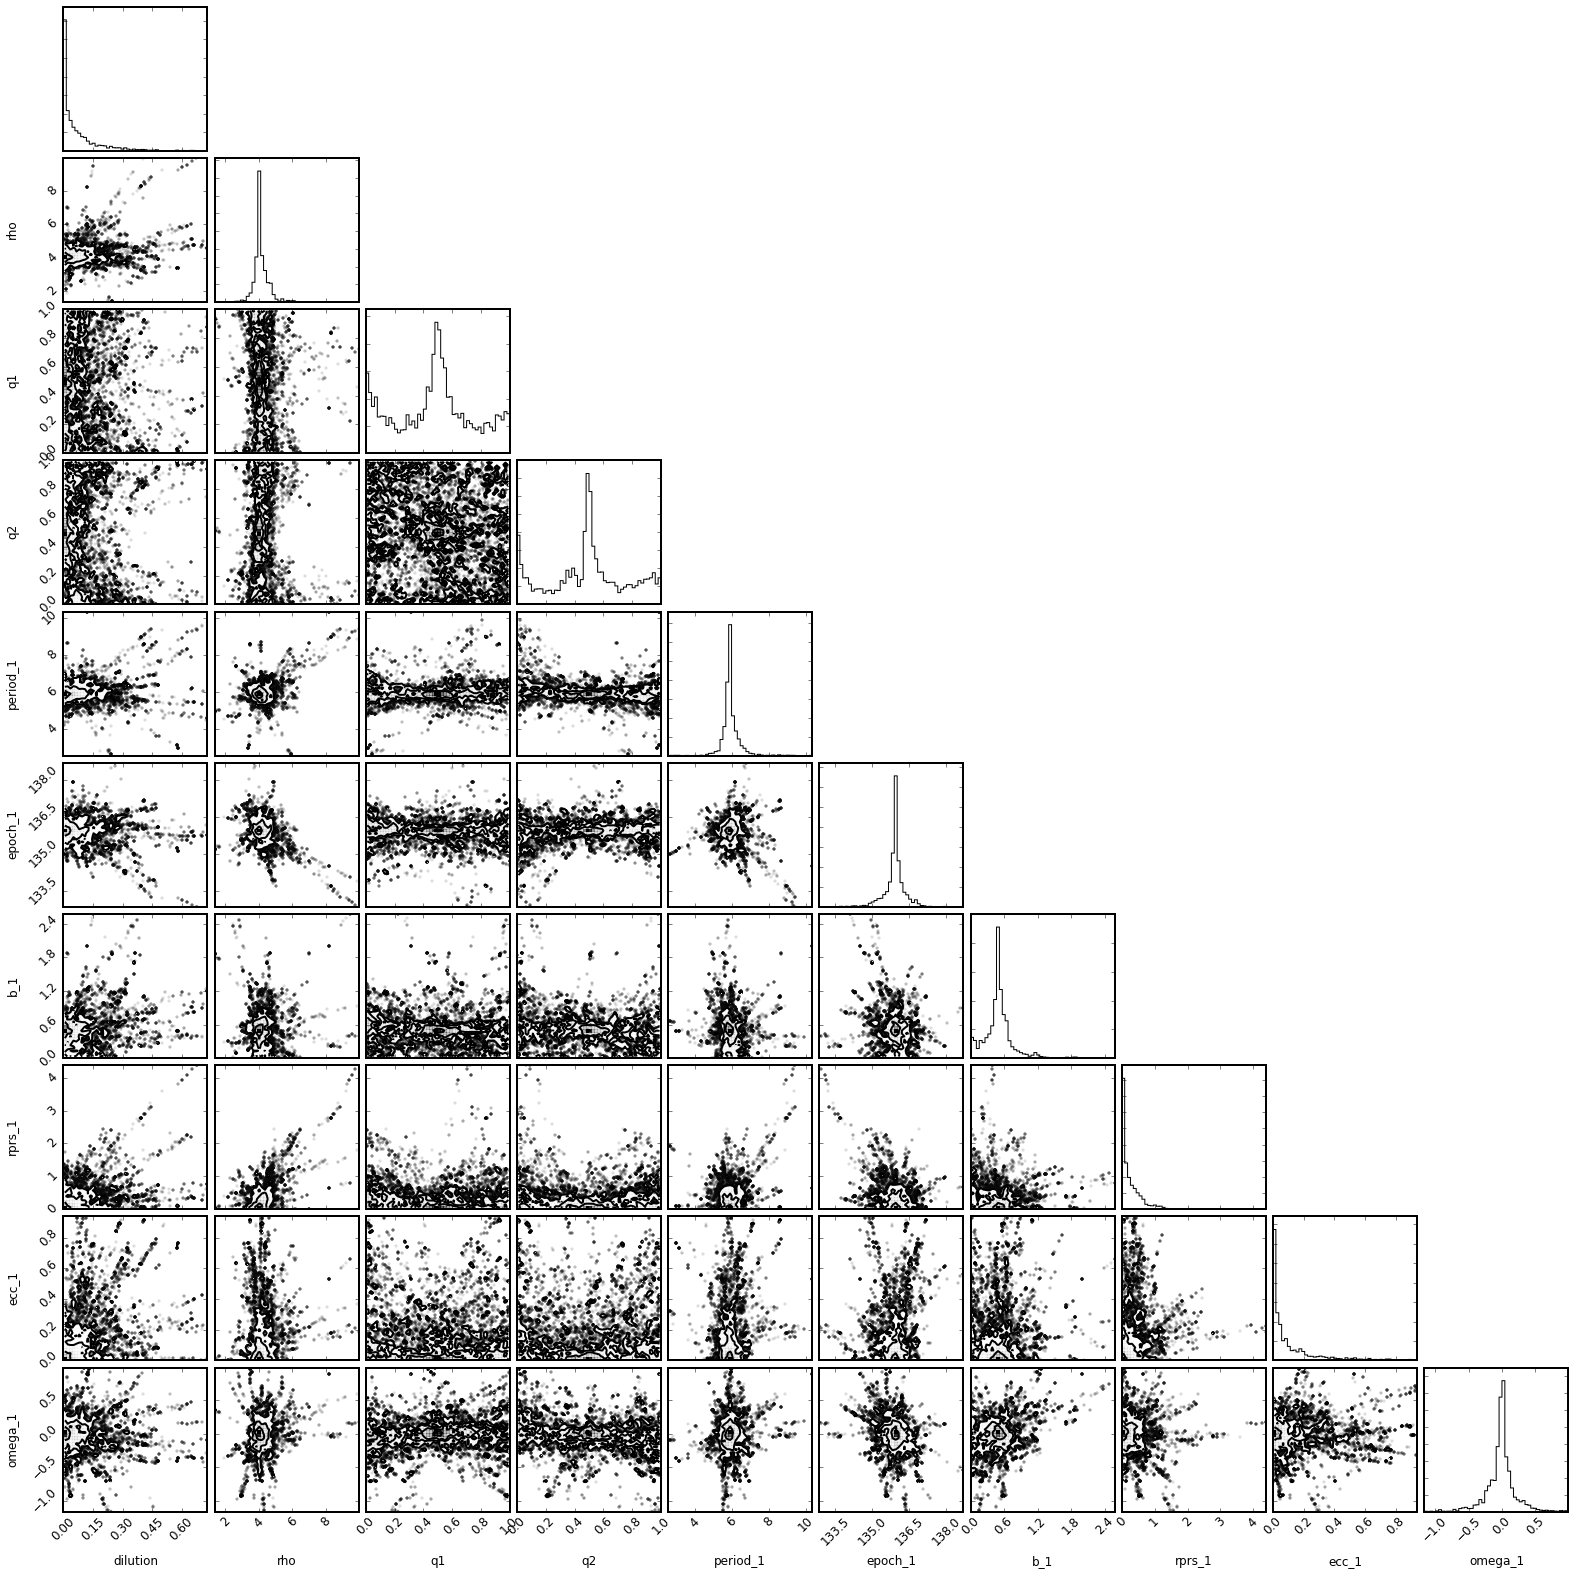

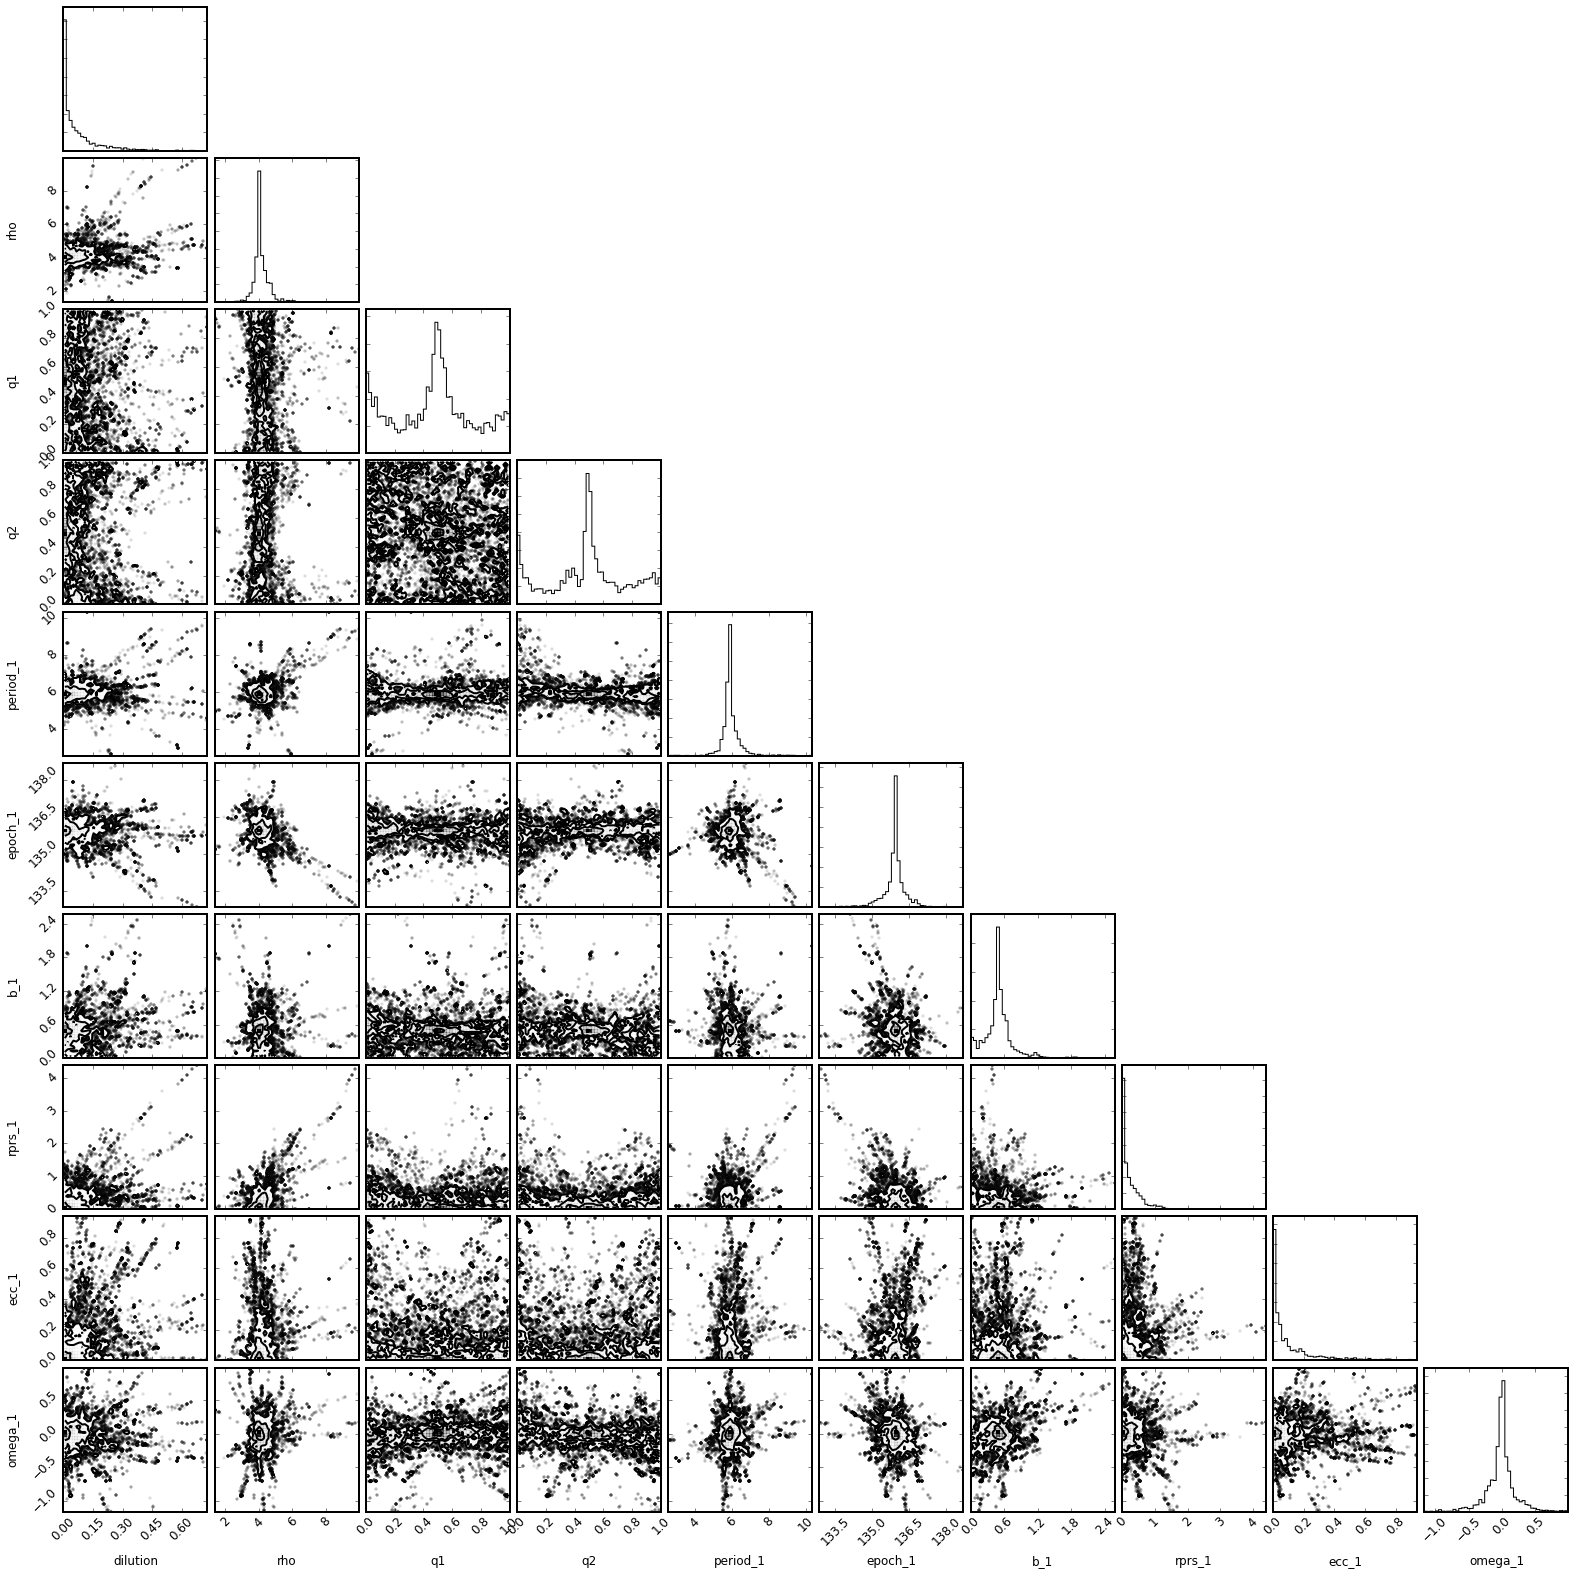

In [11]:
model.triangle(i=0); #need to put some priors on P/epoch